C:\Users\carlo\AppData\Local\Temp\ipykernel_11396\872070761.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


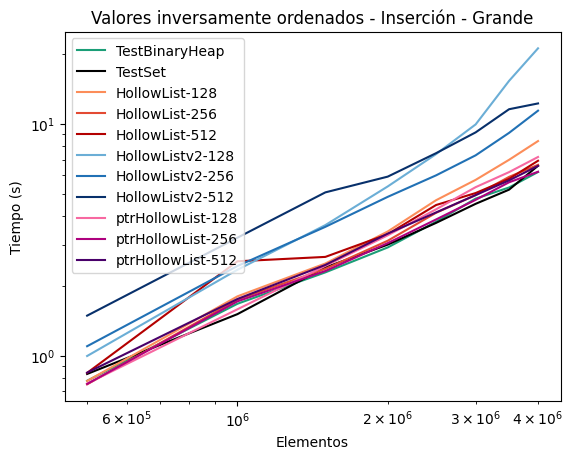

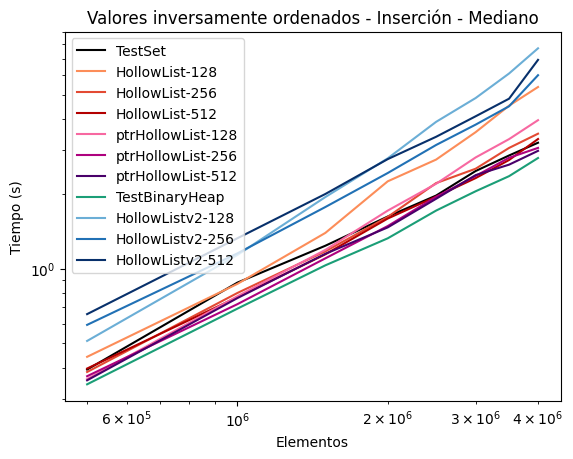

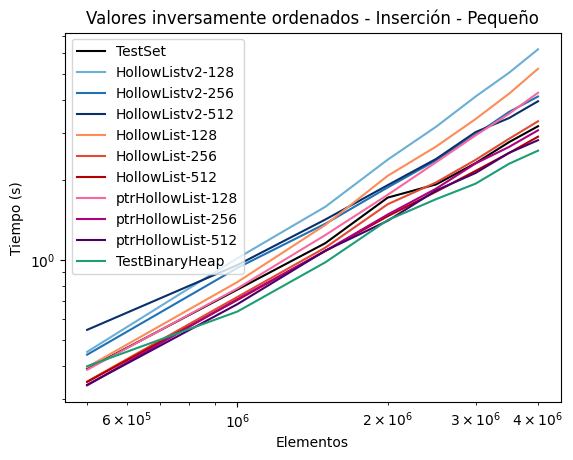

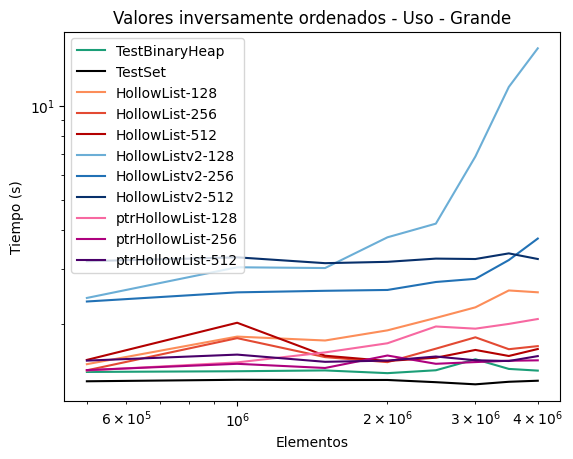

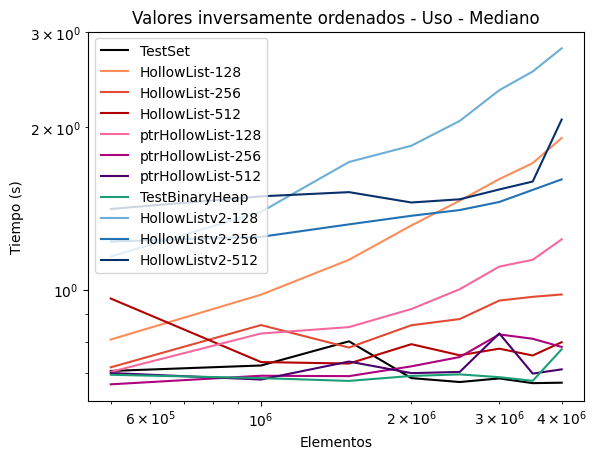

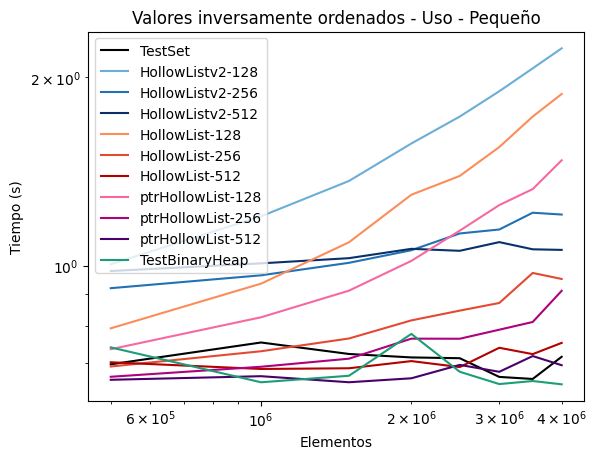

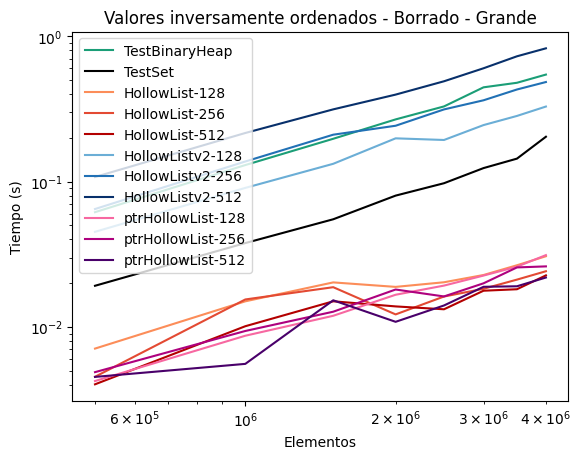

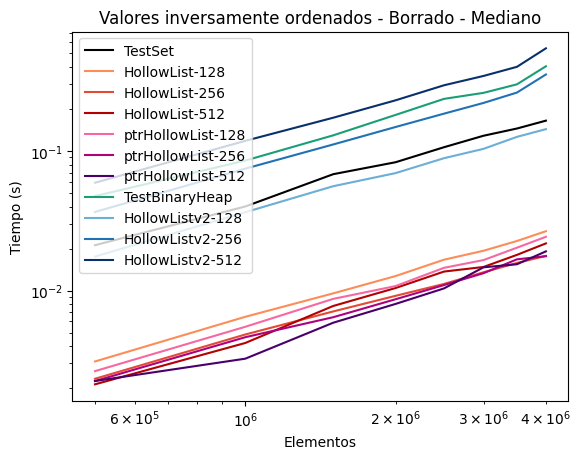

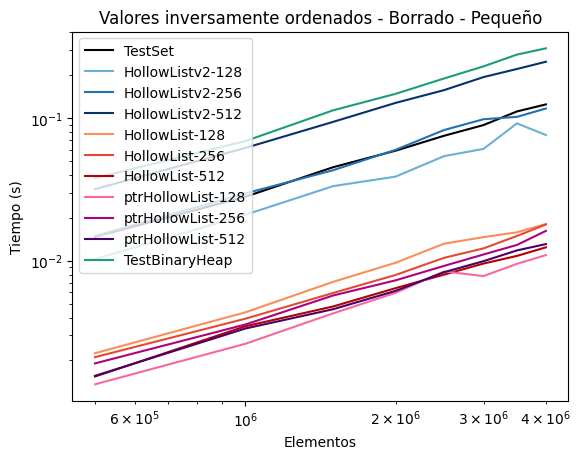

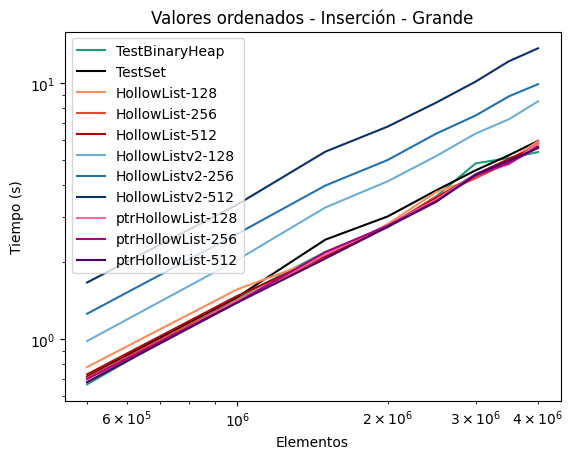

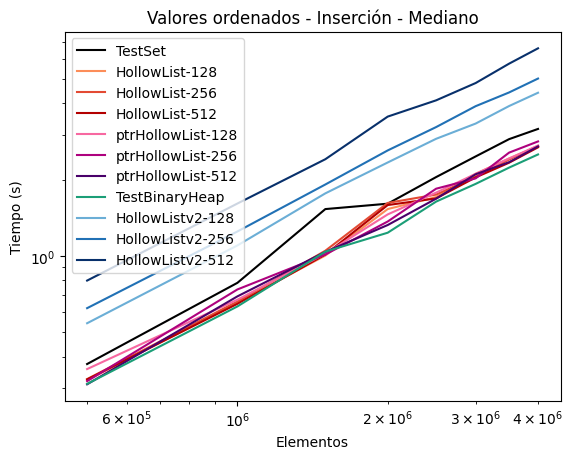

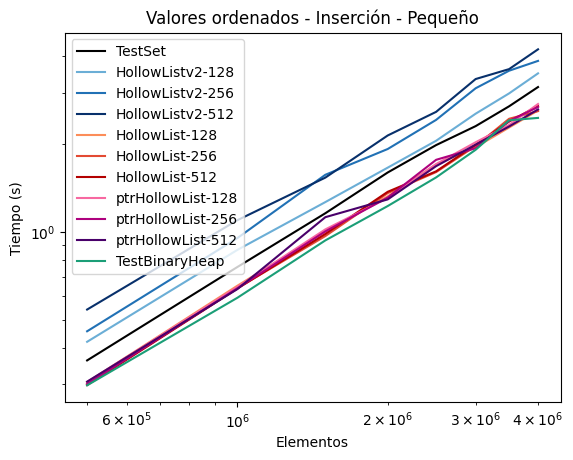

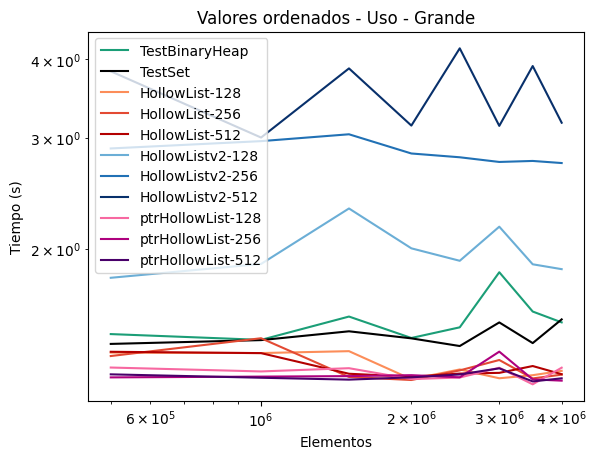

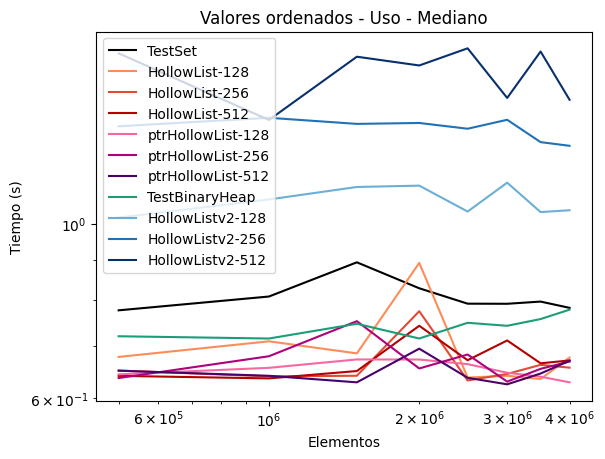

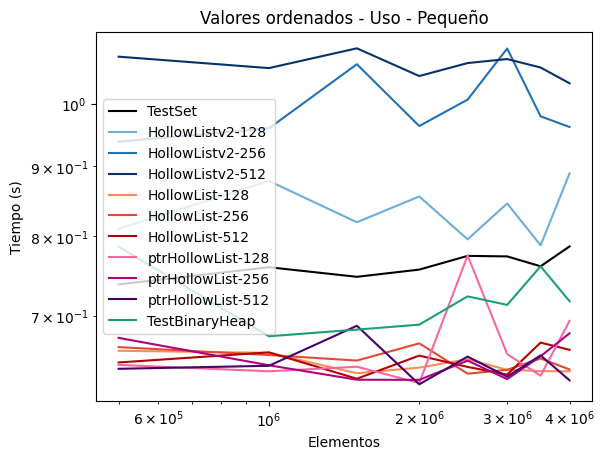

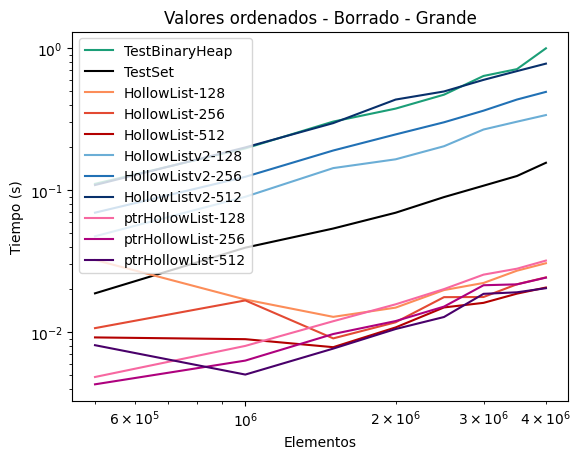

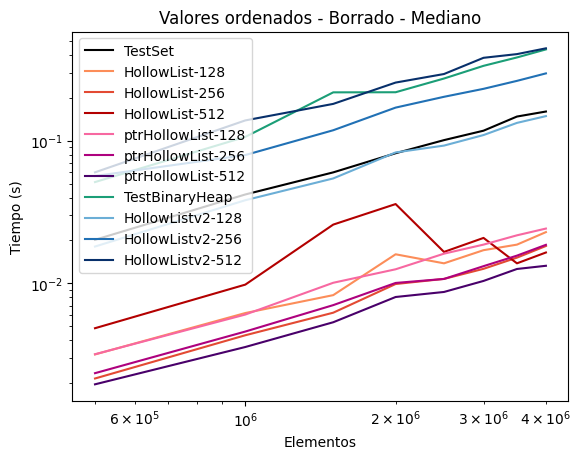

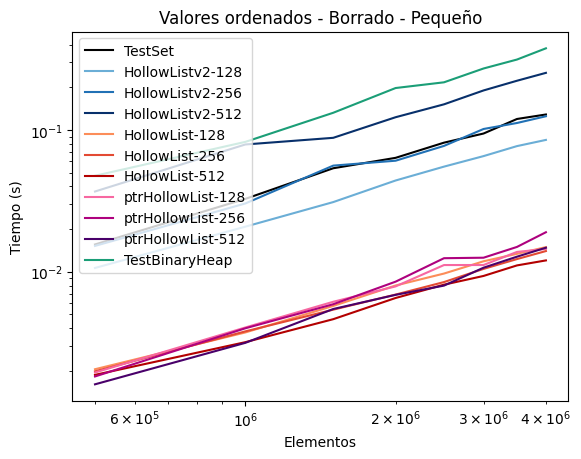

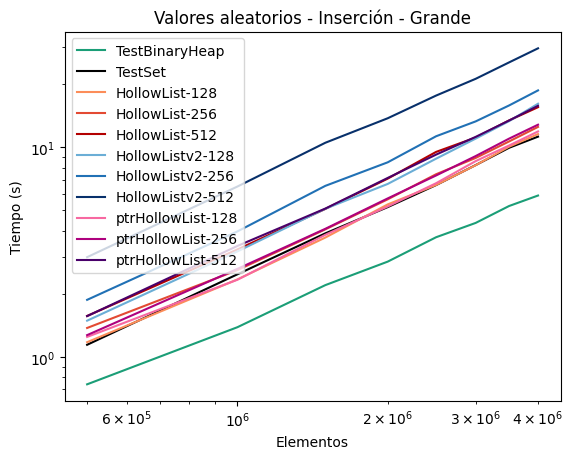

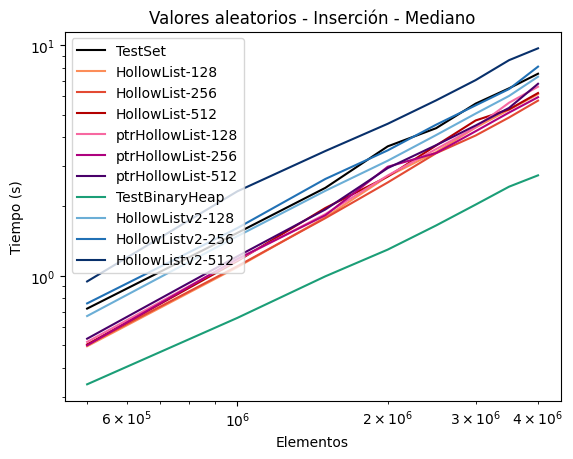

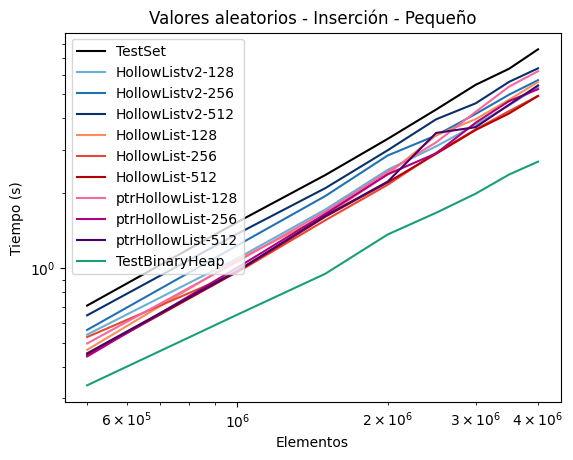

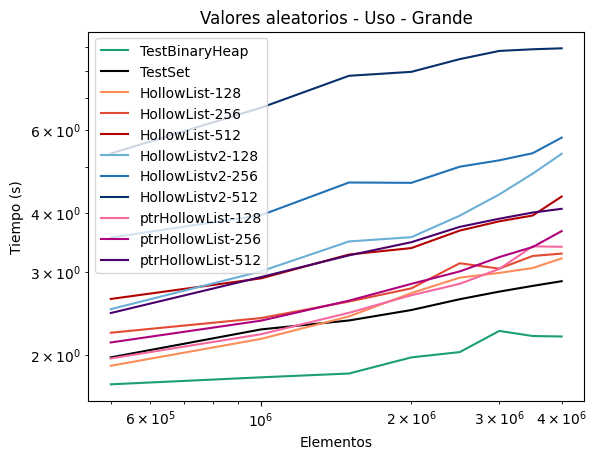

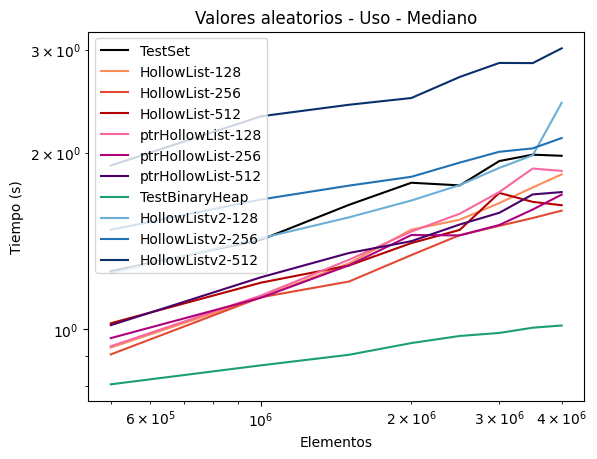

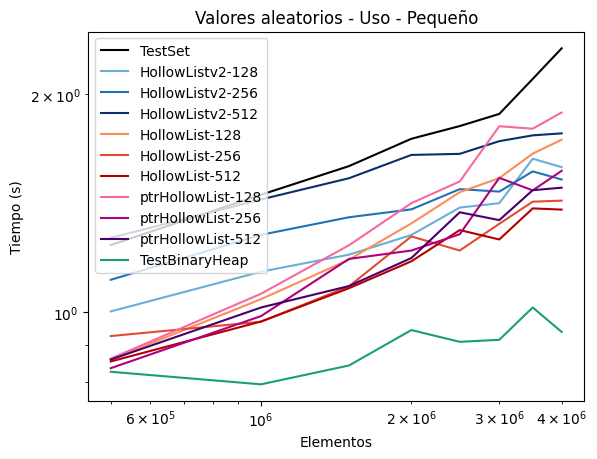

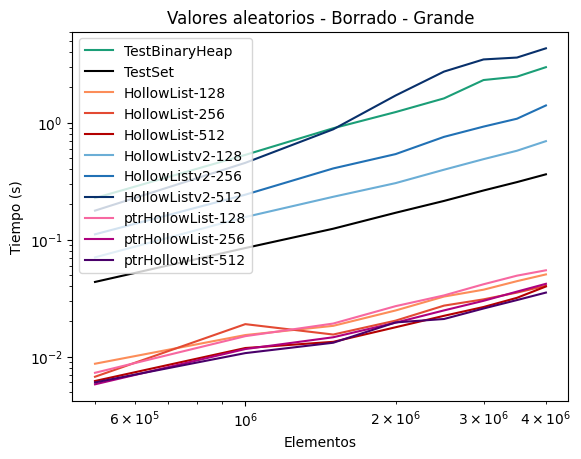

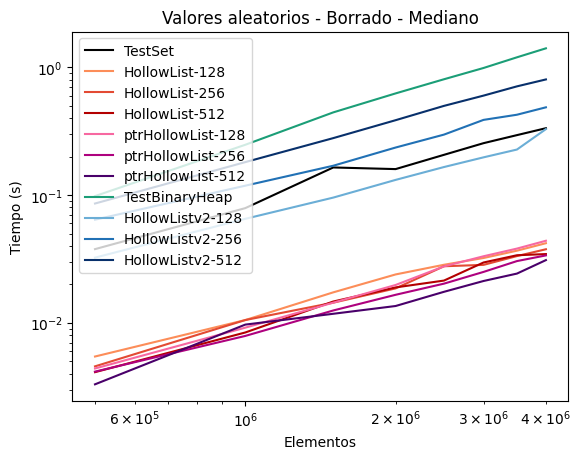

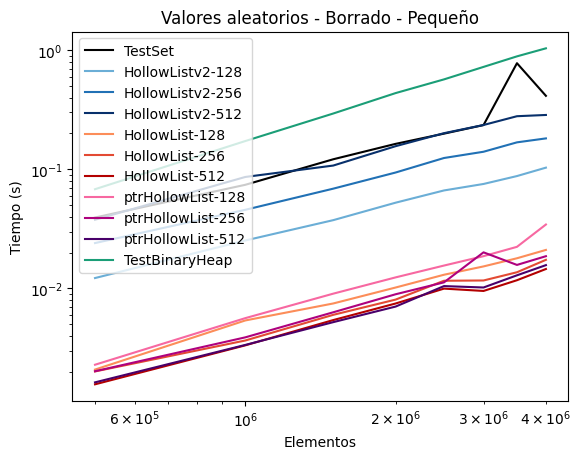

In [20]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
gen = {"GenRandom": "Valores aleatorios", "GenOrdered": "Valores ordenados", "GenInverse": "Valores inversamente ordenados"}
tests = {"INSERT": "Inserción", "USAGE": "Uso", "REMOVE": "Borrado"}
object ={"Small": "Pequeño", "Medium": "Mediano", "Large": "Grande"}
colores = {"TestBinaryHeap": '#1b9e77', "TestSet": "black", "ptrHollowList-128": '#f768a1',
"ptrHollowList-256": '#ae017e', "ptrHollowList-512": '#49006a', "HollowList-128": '#fc8d59', "HollowList-256": '#e34a33', "HollowList-512": '#b30000', 
"TestVector": "maroon", "HollowListv2-128": '#6baed6', "HollowListv2-256": '#2171b5', "HollowListv2-512": '#08306b'}
contenido = os.listdir('./CSV/')
for archivo in contenido:
    # archivo termina en .csv y no es sys.csv
    if archivo.endswith(".csv") and archivo != "sys.csv":
        df = pd.read_csv('./CSV/' + archivo)
        for test in df.TEST.unique():
            test_df = df[df.TEST == test]
            for type in test_df.TYPE.unique():
                fig, ax = plt.subplots()
                type_df = test_df[test_df.TYPE == type]
                for program in type_df.PROGRAM.unique():
                    program_df = type_df[type_df.PROGRAM == program]
                    sizes = program_df.SIZE.values
                    times = program_df.TIME.values
                    
                    # Calcula la media de los valores de 'y' cuando hay 'x' que coinciden en valor
                    unique_sizes = np.unique(sizes)
                    averaged_times = np.zeros_like(unique_sizes,dtype=np.float64)
                    for i, size in enumerate(unique_sizes):
                        averaged_times[i] = np.mean(times[sizes == size])
                    ax.plot(unique_sizes, averaged_times, label=program, color=colores[program])
                
                ax.legend()
                
                
               
                ax.set_title(f"{gen[Path(archivo).stem]} - {tests[test]} - {object[type]}")
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel('Elementos')
                plt.ylabel('Tiempo (s)')
                filename = "Todas figure_{}-{}-{}.svg".format(Path(archivo).stem, type, test)
                plt.savefig(filename, format="svg")

C:\Users\carlo\AppData\Local\Temp\ipykernel_11396\3158420735.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


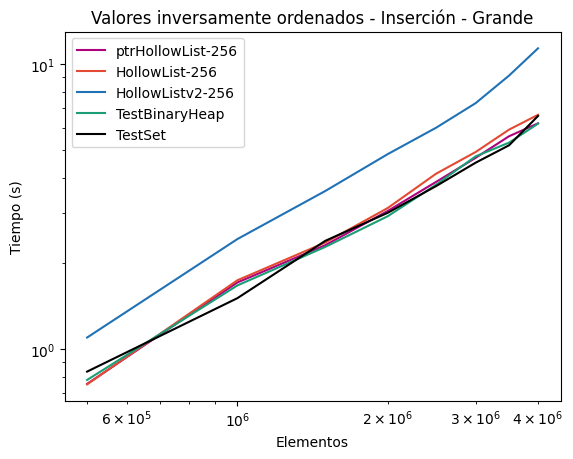

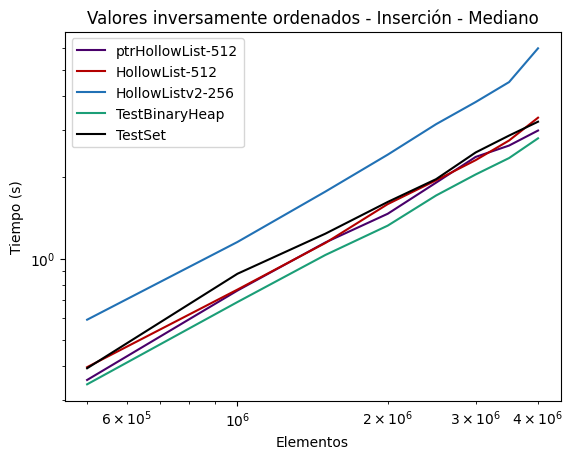

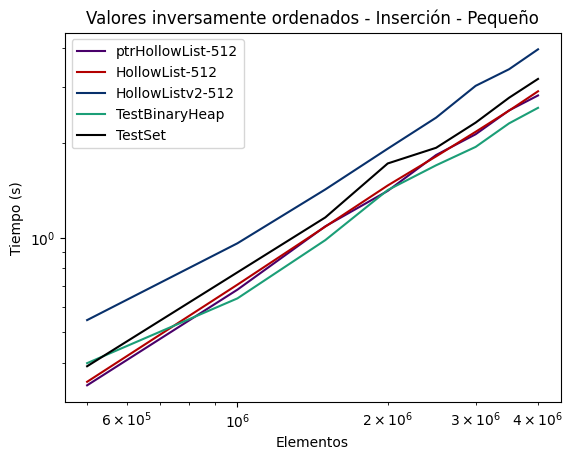

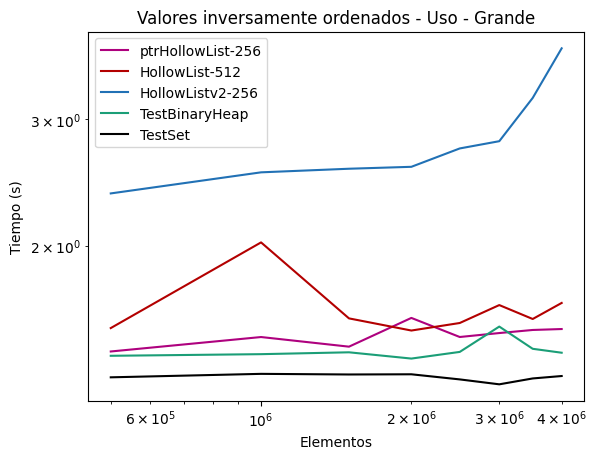

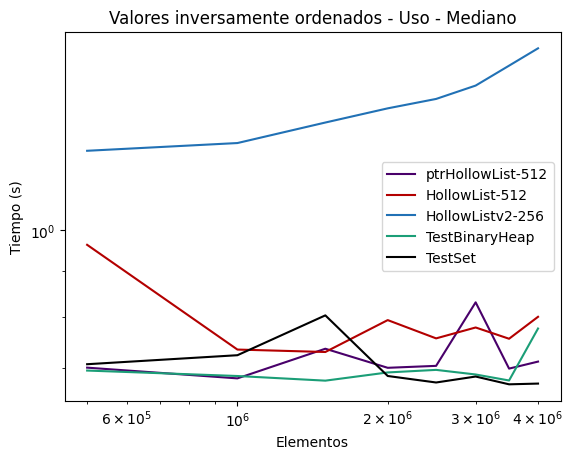

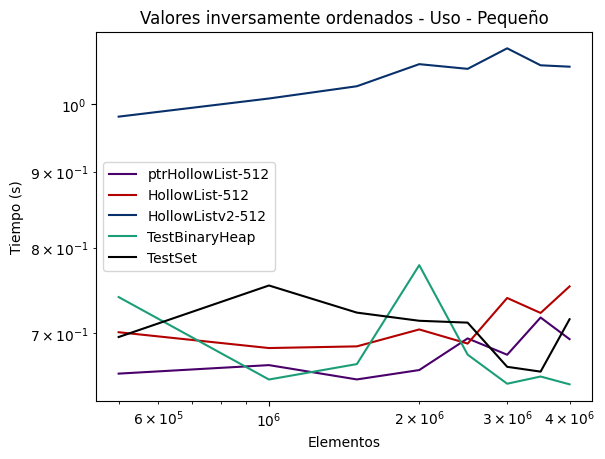

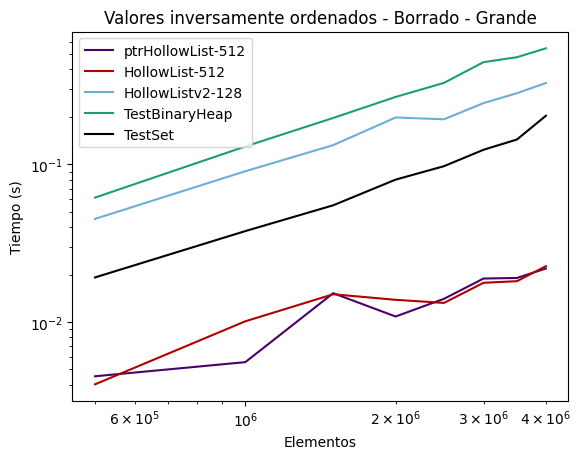

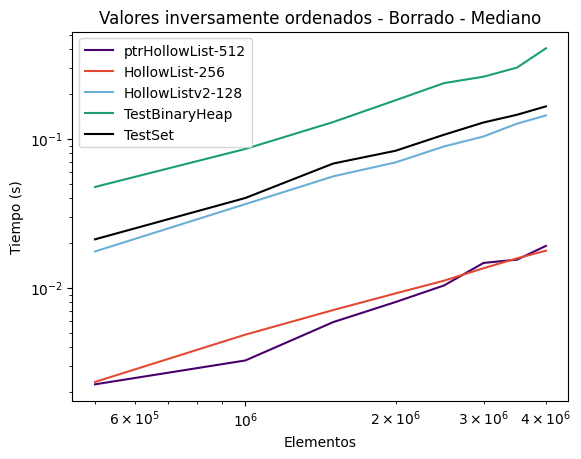

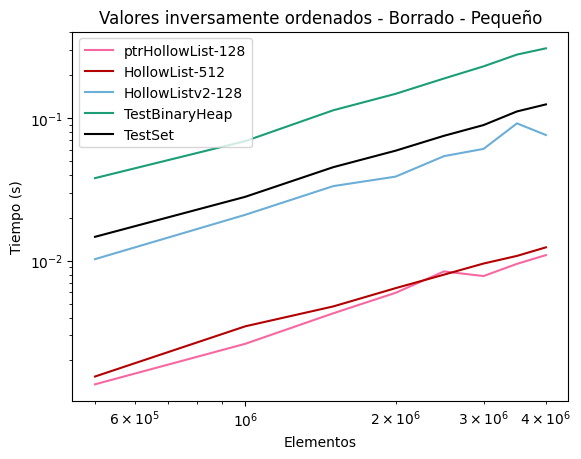

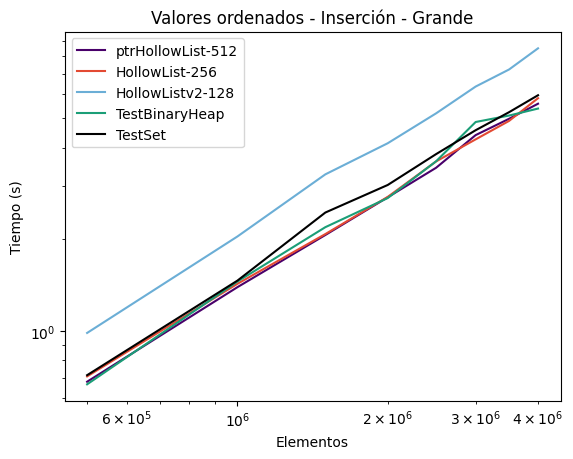

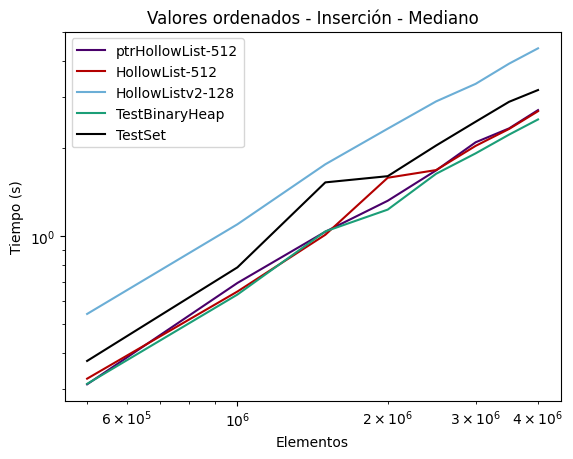

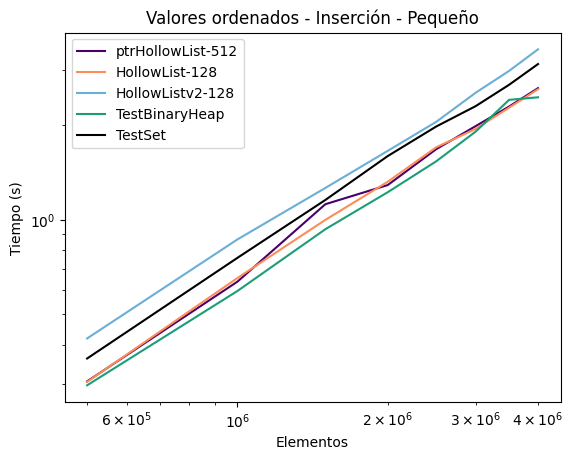

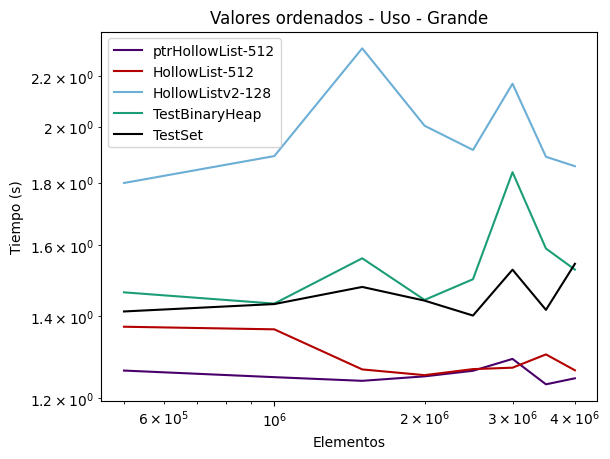

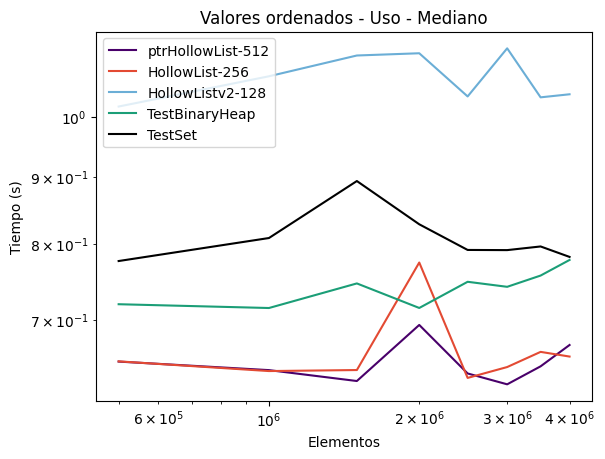

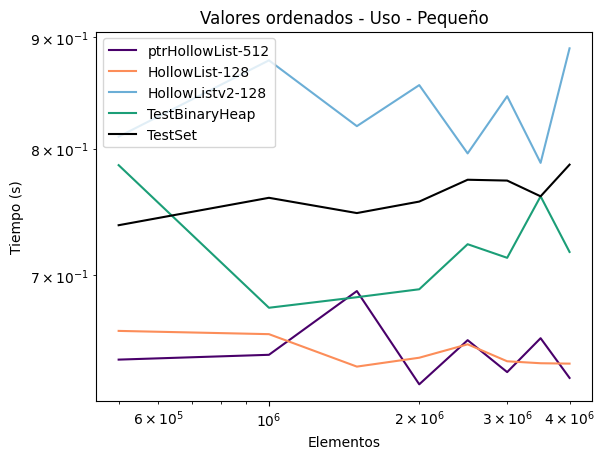

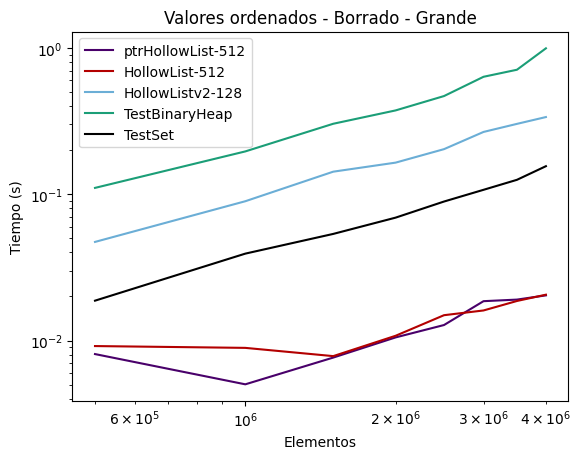

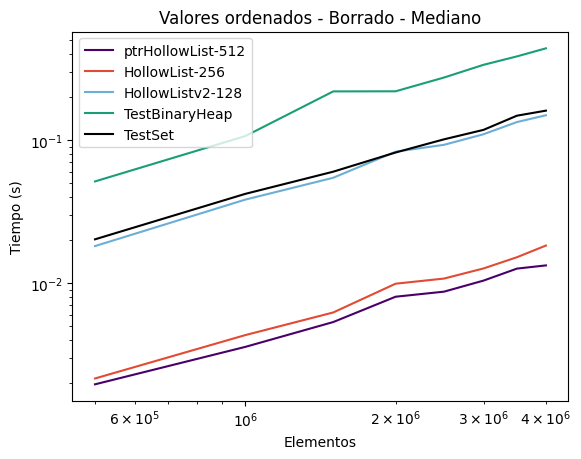

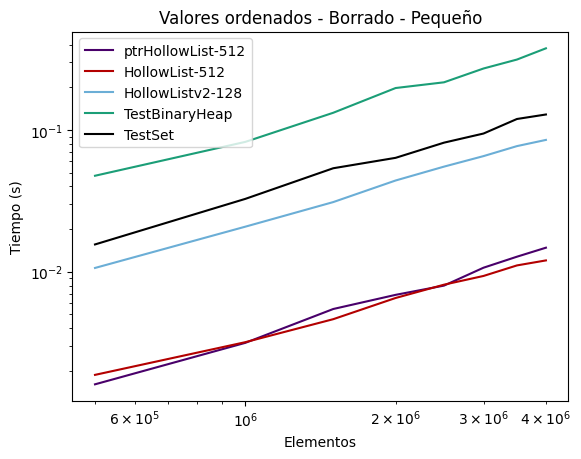

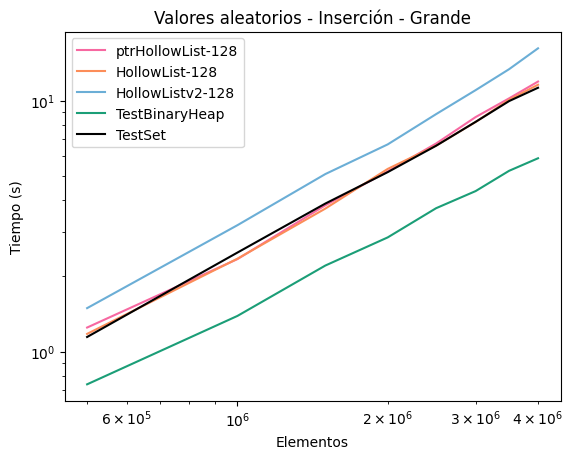

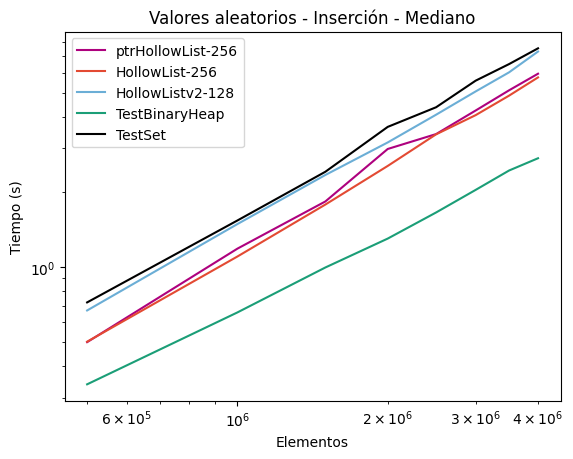

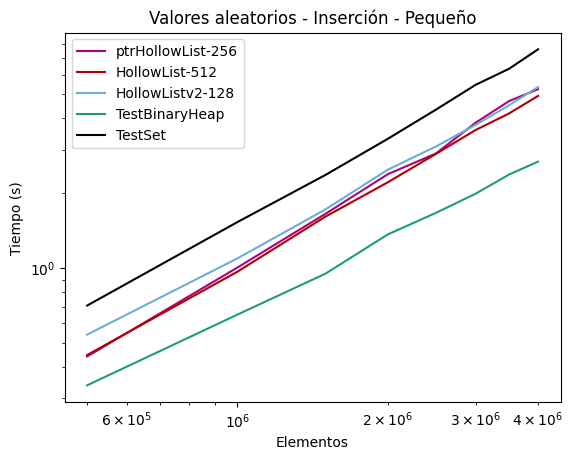

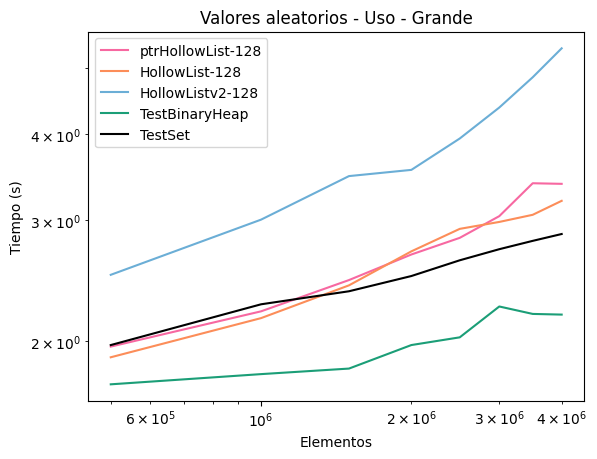

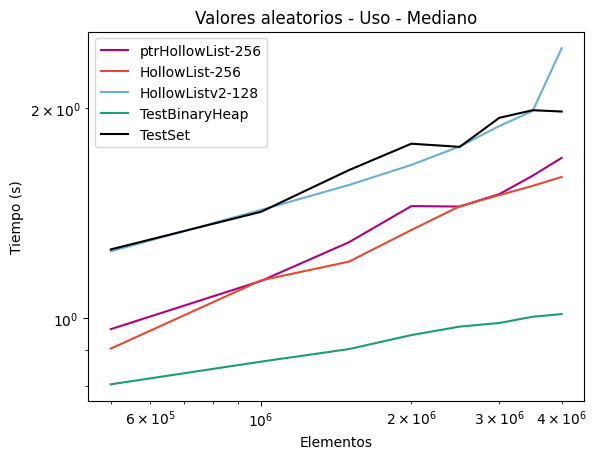

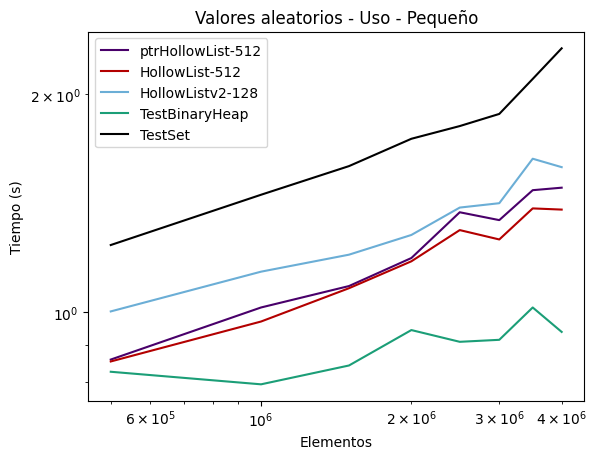

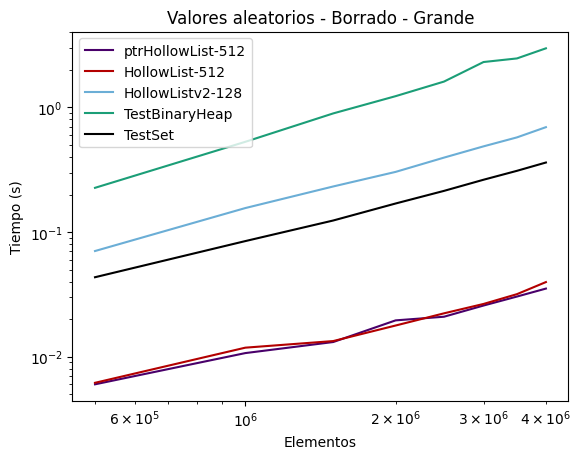

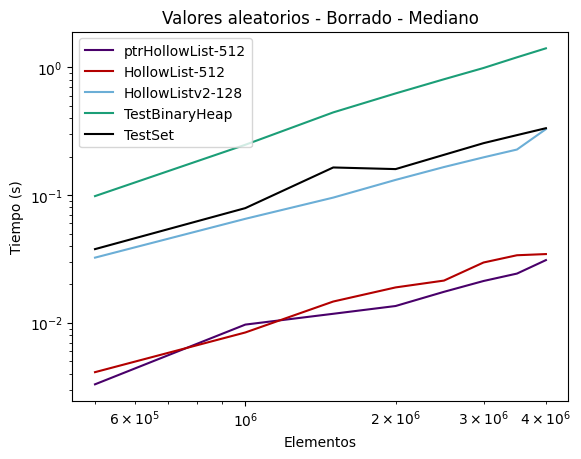

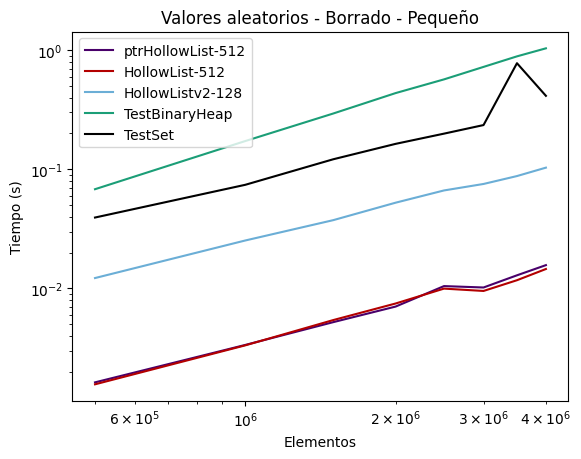

In [19]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
gen = {"GenRandom": "Valores aleatorios", "GenOrdered": "Valores ordenados", "GenInverse": "Valores inversamente ordenados"}
tests = {"INSERT": "Inserción", "USAGE": "Uso", "REMOVE": "Borrado"}
object ={"Small": "Pequeño", "Medium": "Mediano", "Large": "Grande"}
colores = {"TestBinaryHeap": '#1b9e77', "TestSet": "black", "ptrHollowList-128": '#f768a1',
"ptrHollowList-256": '#ae017e', "ptrHollowList-512": '#49006a', "HollowList-128": '#fc8d59', "HollowList-256": '#e34a33', "HollowList-512": '#b30000', 
"TestVector": "maroon", "HollowListv2-128": '#6baed6', "HollowListv2-256": '#2171b5', "HollowListv2-512": '#08306b'}

contenido = os.listdir('./CSV/')
for archivo in contenido:
    # archivo termina en .csv y no es sys.csv
    if archivo.endswith(".csv") and archivo != "sys.csv":
        df = pd.read_csv('./CSV/' + archivo)
        
        programs_to_select = {
            'ptrHollowList': ['ptrHollowList-128', 'ptrHollowList-256', 'ptrHollowList-512'],
            'HollowList': ['HollowList-128', 'HollowList-256', 'HollowList-512'],
            'HollowListv2': ['HollowListv2-128', 'HollowListv2-256', 'HollowListv2-512'],
            'TestBinaryHeap': ['TestBinaryHeap'],
            'TestSet': ['TestSet']
        }
        for test in df.TEST.unique():
            test_df = df[df.TEST == test]
            for type in test_df.TYPE.unique():
                type_df = test_df[test_df.TYPE == type]
                fig, ax = plt.subplots()
                for programs in programs_to_select.values():
                    
                    best_program = None
                    best_times = None
                    for program in programs:
                       
                        program_df = type_df[type_df.PROGRAM == program]
                        sizes = program_df.SIZE.values
                        times = program_df.TIME.values
                        unique_sizes = np.unique(sizes)
                        averaged_times = np.zeros_like(unique_sizes, dtype=np.float64)
                        for i, size in enumerate(unique_sizes):
                            averaged_times[i] = np.mean(times[sizes == size])
                        if best_times is None or np.mean(averaged_times) < np.mean(best_times):
                            best_program = program
                            best_times = averaged_times
                    ax.plot(unique_sizes, best_times, label=f"{best_program}", color=colores[best_program])
            
                ax.legend()
                ax.set_title(f"{gen[Path(archivo).stem]} - {tests[test]} - {object[type]}")
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel('Elementos')
                plt.ylabel('Tiempo (s)')
                filename = "figure_{}-{}-{}.svg".format(Path(archivo).stem, type, test)
                plt.savefig(filename, format="svg")


C:\Users\carlo\AppData\Local\Temp\ipykernel_11396\2594636906.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


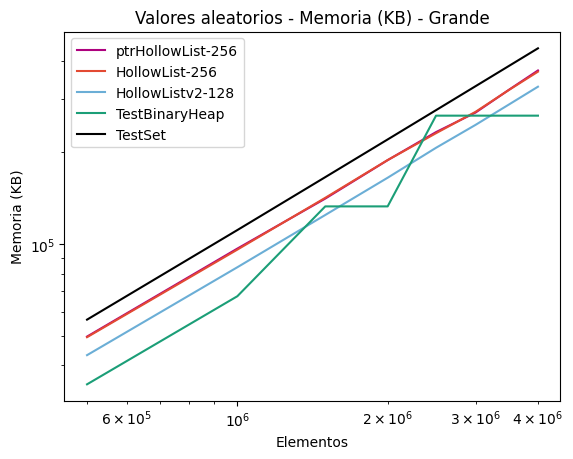

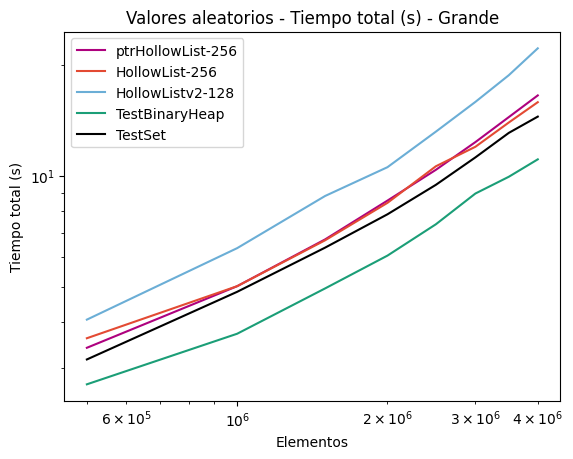

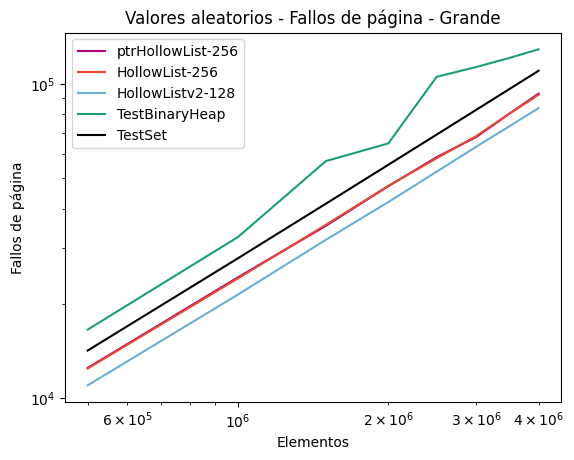

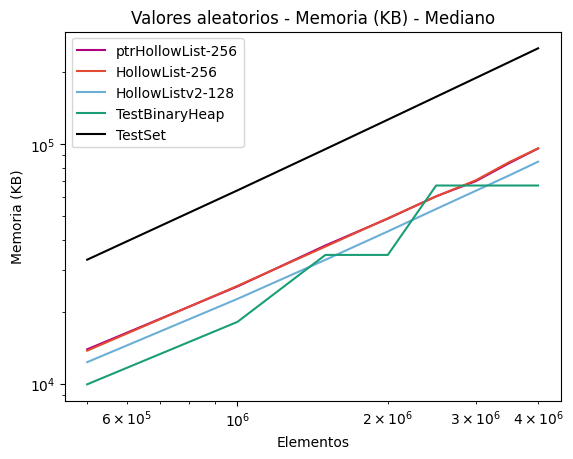

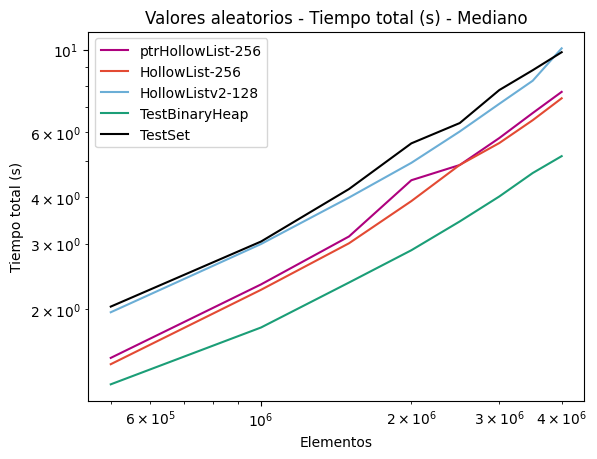

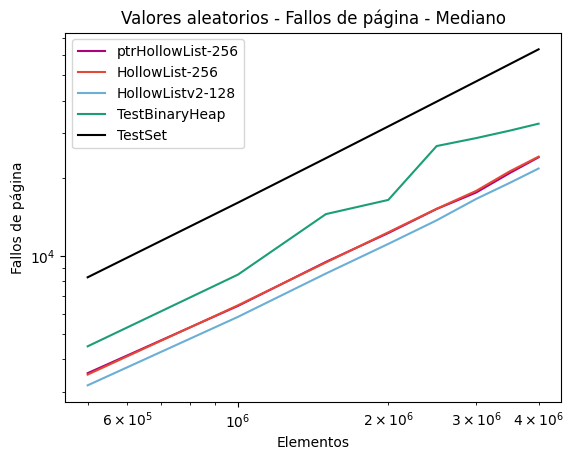

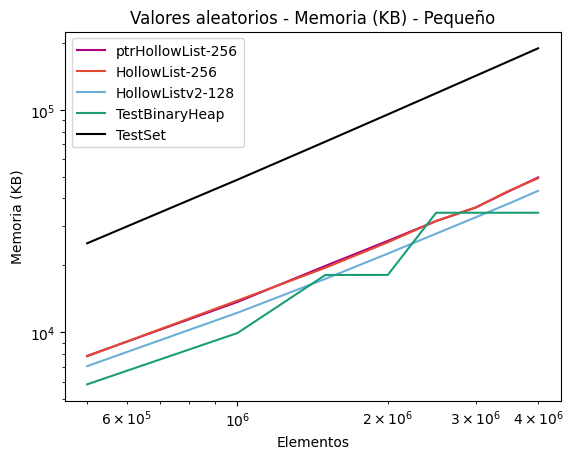

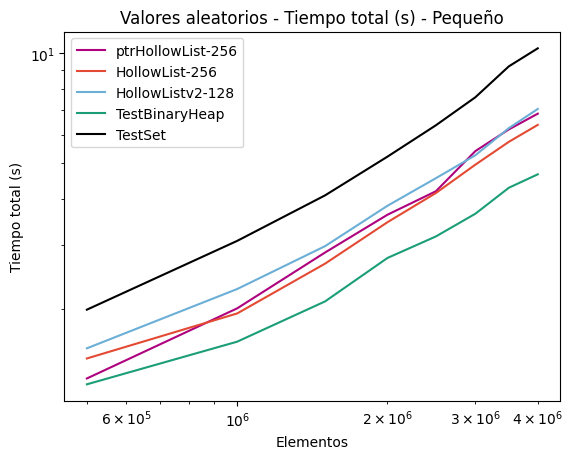

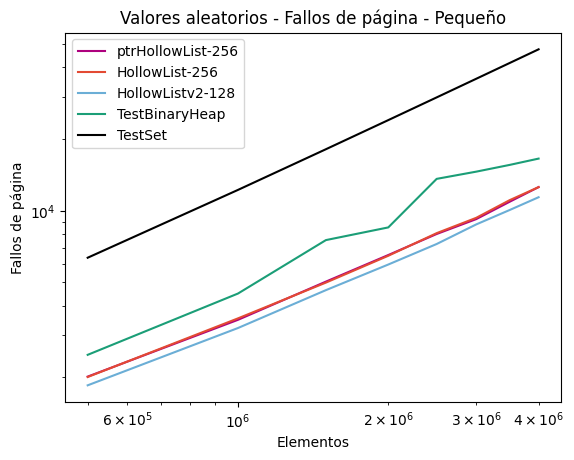

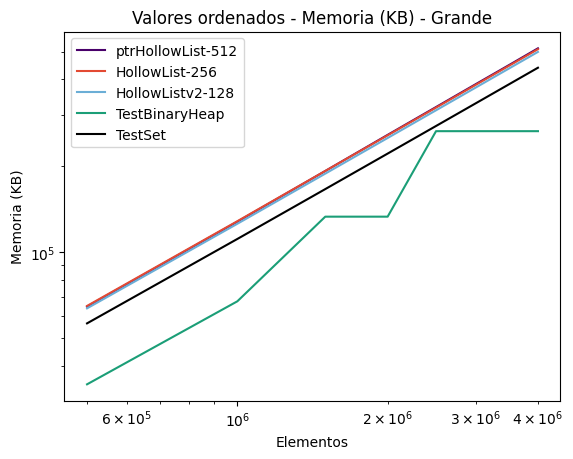

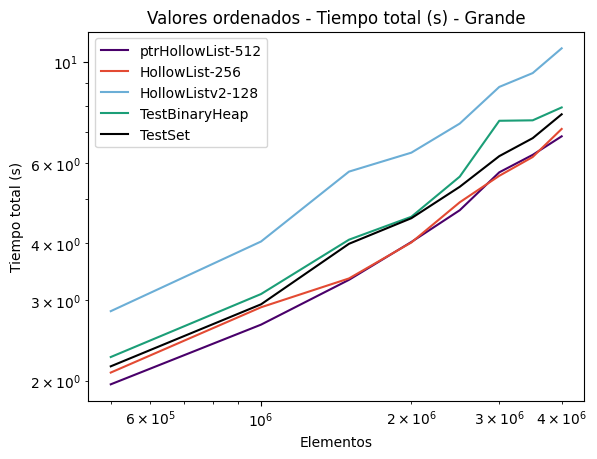

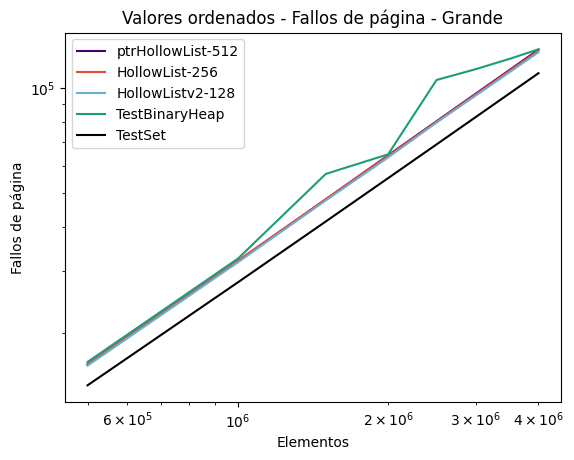

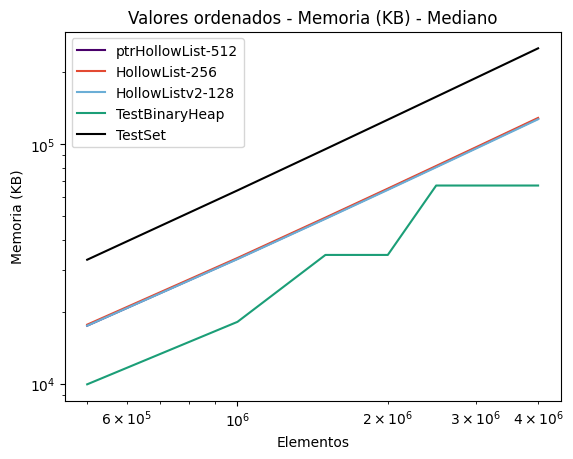

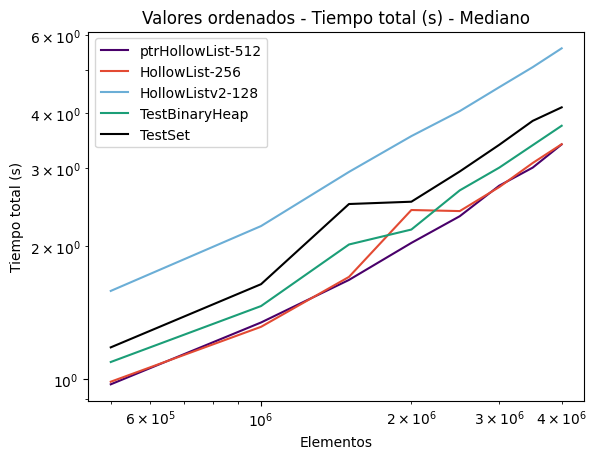

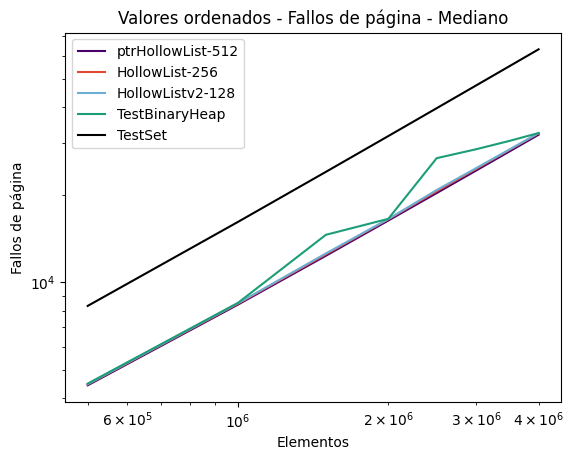

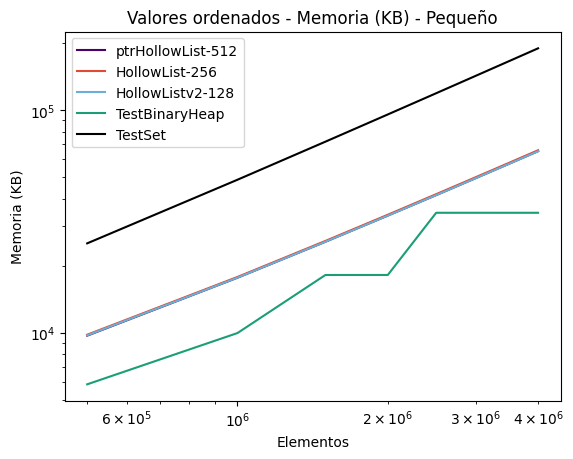

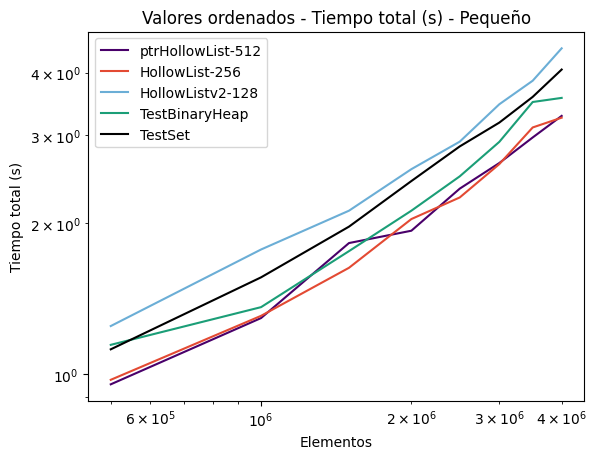

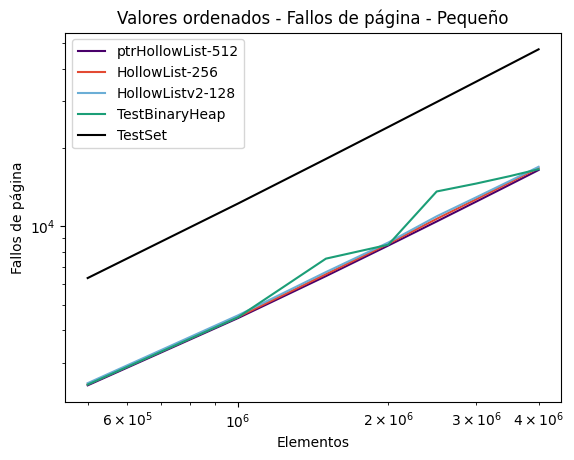

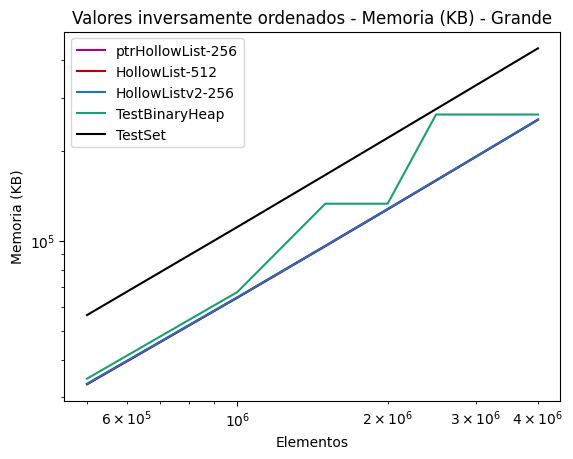

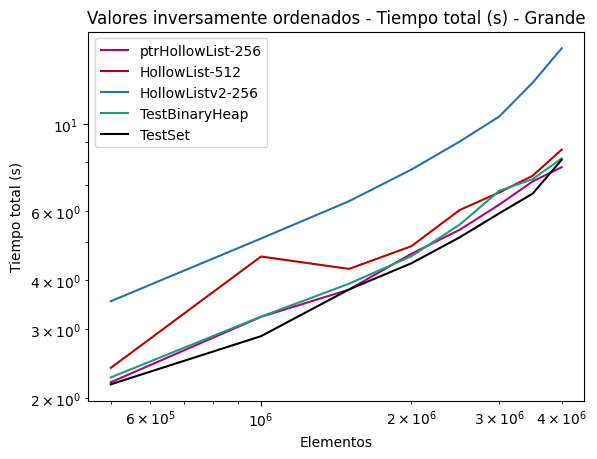

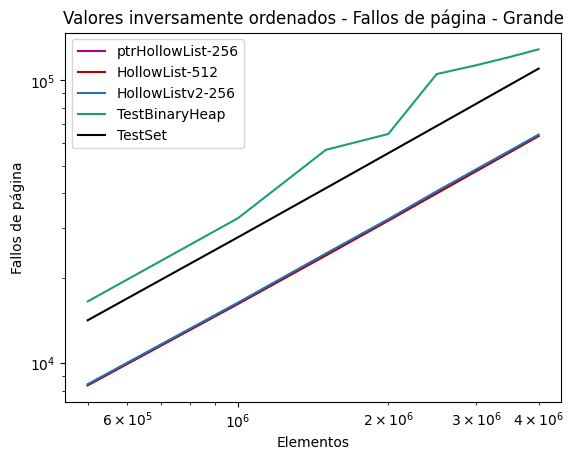

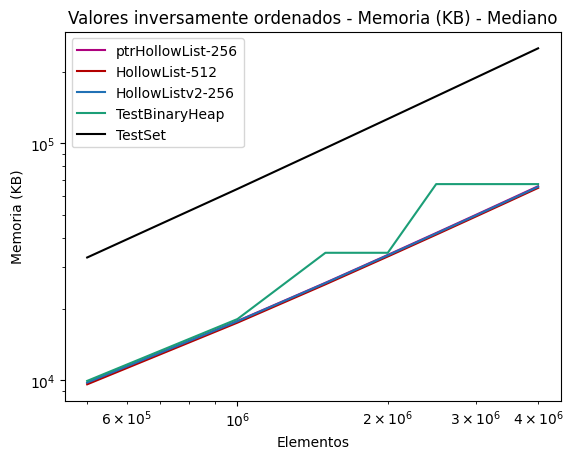

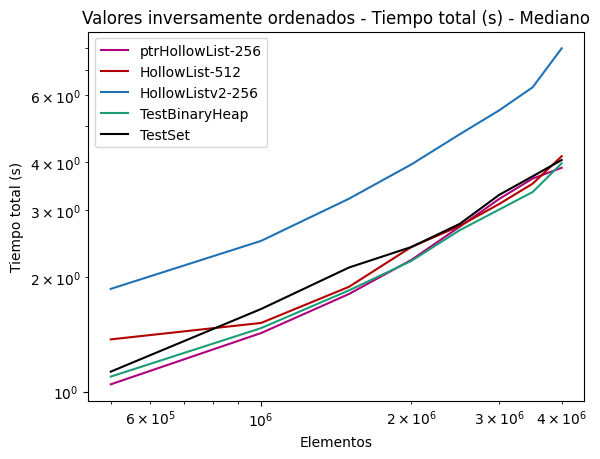

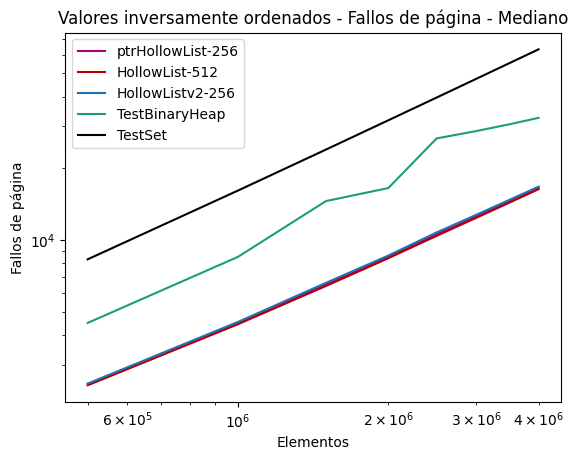

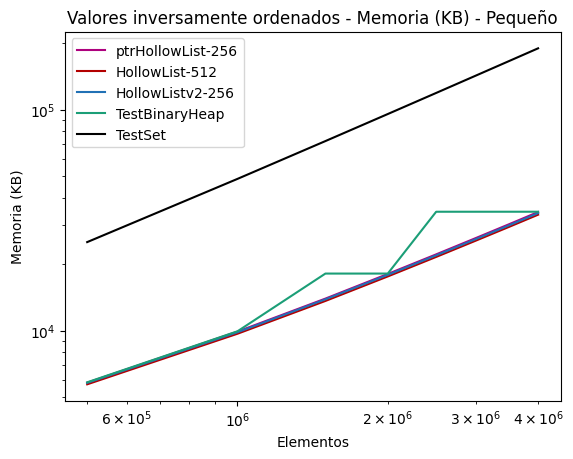

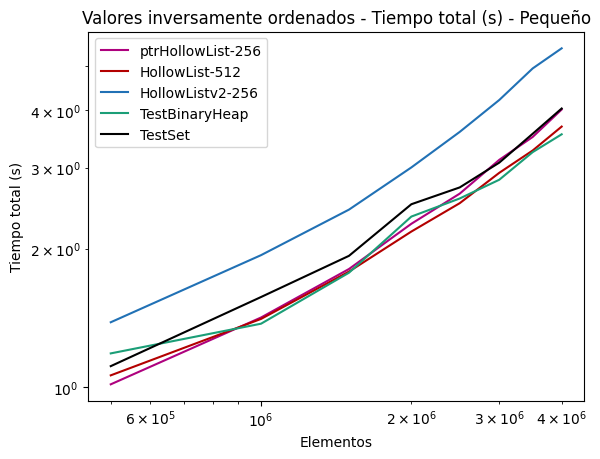

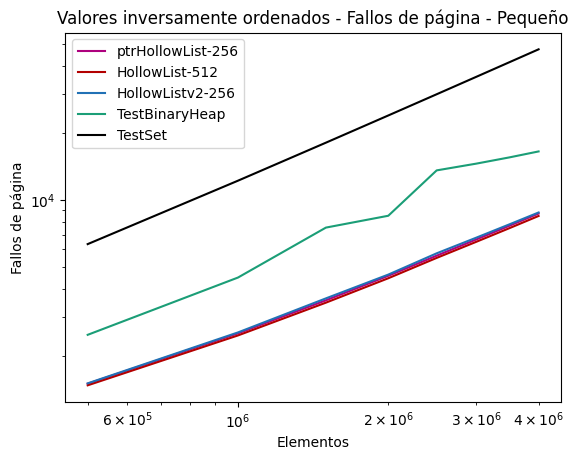

In [14]:
df = pd.read_csv('./CSV/sys.csv')
tests = {"GenRandom": "Valores aleatorios", "GenOrdered": "Valores ordenados", "GenInverse": "Valores inversamente ordenados"}
tipos = {0: "Pequeño", 1: "Mediano", 2: "Grande"}


def graph(x, y, label, test, tipo, test_df, best_programs):
    fig, ax = plt.subplots()
    for program in best_programs:
        sizes = x[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]
        times = y[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]
        unique_sizes = np.unique(sizes)
        averaged_times = np.zeros_like(unique_sizes,dtype=np.float64)
        for i, size in enumerate(unique_sizes):
            averaged_times[i] = np.mean(times[sizes == size])
        tipo_label = tipos[tipo]
        p_label = f"{program}"
        color = colores[program]
        ax.plot(unique_sizes, averaged_times, label=p_label, color=color)
    ax.legend()
    ax.set_title(f"{tests[test]} - {label} - {tipo_label}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Elementos')
    plt.ylabel(label)
    filename = "figure_{}-{}-{}.svg".format(label, test, tipo)
    plt.savefig(filename, format="svg")

for test in df.TEST.unique():
    test_df = df[df.TEST == test]
    for tipo in test_df.TYPE.unique():
        best_programs = []    
        for programs in programs_to_select.values():
            best_program = None
            best_times = None
            for program in programs:
                
                program_df = test_df[test_df.PROGRAM == program]
                sizes = program_df.SIZE.values
                times = program_df.ELAPSED_TIME.values
                unique_sizes = np.unique(sizes)
                averaged_times = np.zeros_like(unique_sizes, dtype=np.float64)
                for i, size in enumerate(unique_sizes):
                    averaged_times[i] = np.mean(times[sizes == size])
                if best_times is None or np.mean(averaged_times) < np.mean(best_times):
                    best_program = program
                    best_times = averaged_times
            best_programs.append(best_program)

            
        graph(test_df.SIZE.values, test_df.MEM.values, 'Memoria (KB)', test, tipo, test_df, best_programs)
        # graph(test_df.SIZE.values, test_df.SYS_TIME.values, 'System Time (s)', test, tipo, test_df)
        graph(test_df.SIZE.values, test_df.ELAPSED_TIME.values, 'Tiempo total (s)', test, tipo, test_df, best_programs)
        graph(test_df.SIZE.values, test_df.PAGE_FAULTS.values, 'Fallos de página', test, tipo, test_df, best_programs)


In [ ]:
df = pd.read_csv('./CSV/sys.csv')
tests = {"GenRandom": "Valores aleatorios", "GenOrdered": "Valores ordenados", "GenInverse": "Valores inversamente ordenados"}
tipos = {0: "Pequeño", 1: "Mediano", 2: "Grande"}


def graph(x, y, label, test, tipo, test_df):
    fig, ax = plt.subplots()
    for program in test_df.PROGRAM.unique():
        sizes = x[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]
        times = y[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]
        unique_sizes = np.unique(sizes)
        averaged_times = np.zeros_like(unique_sizes,dtype=np.float64)
        for i, size in enumerate(unique_sizes):
            averaged_times[i] = np.mean(times[sizes == size])
        tipo_label = tipos[tipo]
        p_label = f"{program}"
        color = colores[program]
        ax.plot(unique_sizes, averaged_times, label=p_label, color=color)
    ax.legend()
    ax.set_title(f"{tests[test]} - {label} - {tipo_label}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Elementos')
    plt.ylabel(label)
    filename = "Todas figure_{}-{}-{}.svg".format(label, test, tipo)
    plt.savefig(filename, format="svg")

for test in df.TEST.unique():
    test_df = df[df.TEST == test]
    for tipo in test_df.TYPE.unique():
        best_programs = []    
       

            
        graph(test_df.SIZE.values, test_df.MEM.values, 'Memoria (KB)', test, tipo, test_df)
        # graph(test_df.SIZE.values, test_df.SYS_TIME.values, 'System Time (s)', test, tipo, test_df)
        graph(test_df.SIZE.values, test_df.ELAPSED_TIME.values, 'Tiempo total (s)', test, tipo, test_df)
        graph(test_df.SIZE.values, test_df.PAGE_FAULTS.values, 'Fallos de página', test, tipo, test_df)